In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [2]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%%bigquery df --project fb-business-datasets
SELECT order_number, created_at, shipping_address_province_code, email, source_channel, sku, title, quantity, revenue, net, `interval`
FROM fb-business-datasets.ds_tables.cleaned_shopify_orderlines_23

Query is running:   0%|          |

Downloading:   0%|          |

### Descriptive Analytics

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_number,940368.0,1603522.418226,159772.312431,1327380.0,1464522.0,1603098.5,1742586.0,1875582.0
quantity,940368.0,1.087542,0.585482,1.0,1.0,1.0,1.0,144.0
revenue,940368.0,30.260704,17.858497,8.0,24.0,26.0,32.0,2688.0
net,940368.0,30.241794,17.852192,5.6,24.0,26.0,32.0,2688.0
interval,219913.0,70.614702,65.499094,0.0,20.0,52.0,102.0,362.0


In [6]:
df.describe(include='object').T

,count,unique,top,freq
shipping_address_province_code,940368,58,CA,103679
email,940368,406041,glorieta73@hotmail.com,229
source_channel,940368,14,Unkown,330592
sku,940368,103,CW566,136802
title,940368,76,Xtra Large Bombshell Volumizer,150585


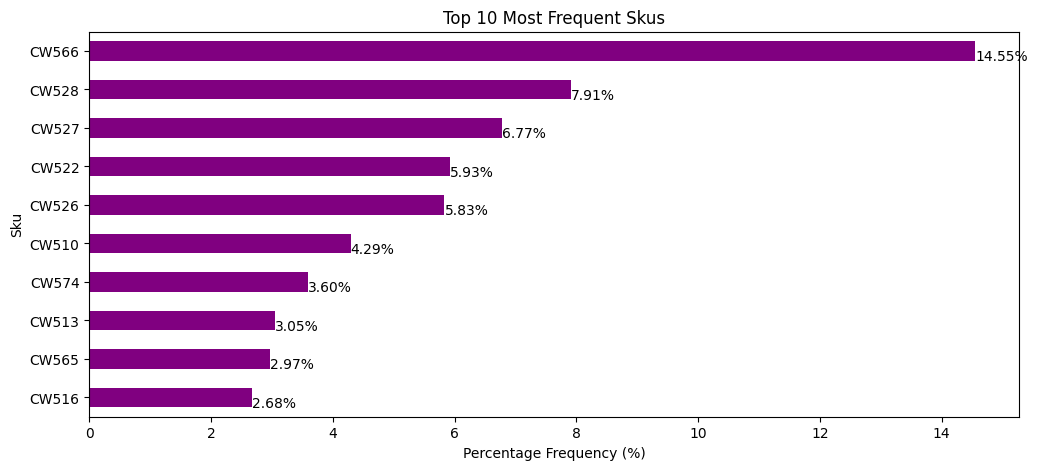

In [7]:
# Finding the top 10 most frequent skus
top_10_sku = df['sku'].value_counts(normalize=True).head(10) * 100

# Plotting the top 10 most frequent skus
plt.figure(figsize=(12, 5))
top_10_sku.plot(kind='barh', color='purple')

# Adding the percentage frequency on the bars
for index, value in enumerate(top_10_sku):
    plt.text(value, index+0.25, f'{value:.2f}%', fontsize=10)

plt.title('Top 10 Most Frequent Skus')
plt.xlabel('Percentage Frequency (%)')
plt.ylabel('Sku')
plt.gca().invert_yaxis()
plt.show()

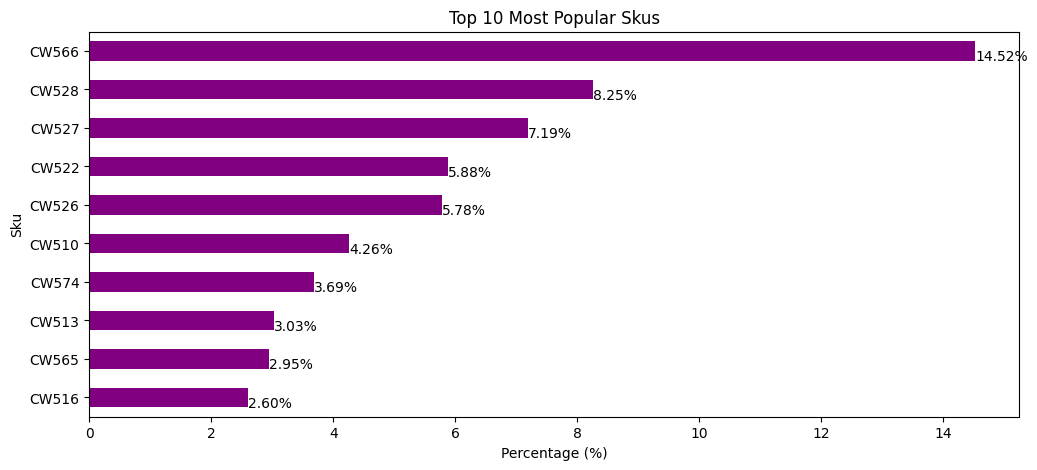

In [8]:
# Finding the top 10 most popular skus
sku_quantity = (df.groupby('sku')['quantity'].sum()/np.sum(df['quantity']) * 100).sort_values(ascending = False)
top_10_sku_quantity = sku_quantity.head(10)

# Plotting the top 10 most popular skus
plt.figure(figsize=(12, 5))
top_10_sku_quantity.plot(kind='barh', color='purple')

# Adding the percentage frequency on the bars
for index, value in enumerate(top_10_sku_quantity):
    plt.text(value, index+0.25, f'{value:.2f}%', fontsize=10)

plt.title('Top 10 Most Popular Skus')
plt.xlabel('Percentage (%)')
plt.ylabel('Sku')
plt.gca().invert_yaxis()
plt.show()

In [9]:
## each row is a unique order
unique_orders = df[['order_number', 'created_at', 'email', 'interval', 'shipping_address_province_code', 'source_channel']].drop_duplicates()
unique_orders.describe().T

,count,mean,std,min,25%,50%,75%,max
order_number,518638.0,1601946.087896,158049.05037,1327380.0,1465360.25,1601955.5,1738707.75,1875582.0
interval,112597.0,68.801718,65.72313,0.0,18.0,49.0,99.0,362.0


In [10]:
unique_orders.describe(include='object').T

,count,unique,top,freq
email,518638,406041,glorieta73@hotmail.com,79
shipping_address_province_code,518638,58,CA,58302
source_channel,518638,14,Facebook(PS),197915


In [11]:
## each row is a repurchasing order
order_again = unique_orders[~pd.isna(unique_orders['interval'])]
print(order_again['interval'].mean())
print(order_again['interval'].mode())

68.80171763013225
0    0.0
Name: interval, dtype: float64


In [12]:
## repurchasing transaction df
repurchase_df = df[~pd.isna(df['interval'])]
repurchase_df.shape

(219913, 11)

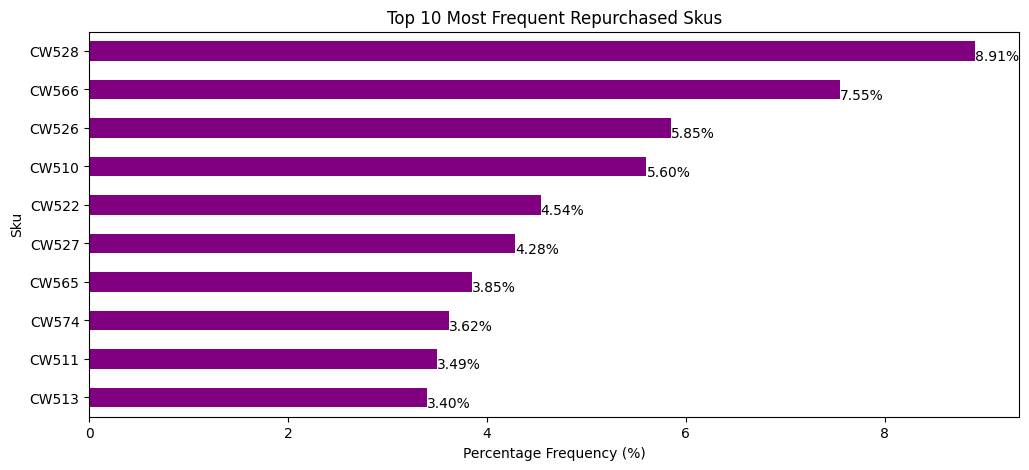

In [13]:
# Finding the top 10 most frequent repurchased skus
top_10_resku = repurchase_df['sku'].value_counts(normalize=True).head(10) * 100

# Plotting the top 10 most frequent repurchased skus
plt.figure(figsize=(12, 5))
top_10_resku.plot(kind='barh', color='purple')

# Adding the percentage frequency on the bars
for index, value in enumerate(top_10_resku):
    plt.text(value, index+0.25, f'{value:.2f}%', fontsize=10)

plt.title('Top 10 Most Frequent Repurchased Skus')
plt.xlabel('Percentage Frequency (%)')
plt.ylabel('Sku')
plt.gca().invert_yaxis()
plt.show()

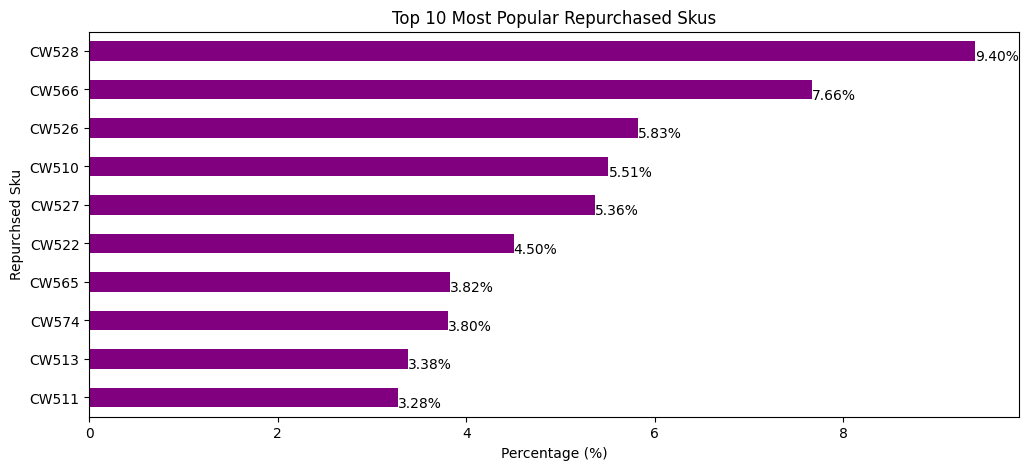

In [14]:
# Finding the top 10 most popular repurchased skus
resku_quantity = (repurchase_df.groupby('sku')['quantity'].sum()/np.sum(repurchase_df['quantity']) * 100).sort_values(ascending = False)
top_10_resku_quantity = resku_quantity.head(10)

# Plotting the top 10 most popular repurchased skus
plt.figure(figsize=(12, 5))
top_10_resku_quantity.plot(kind='barh', color='purple')

# Adding the percentage on the bars
for index, value in enumerate(top_10_resku_quantity):
    plt.text(value, index+0.25, f'{value:.2f}%', fontsize=10)

plt.title('Top 10 Most Popular Repurchased Skus')
plt.xlabel('Percentage (%)')
plt.ylabel('Repurchsed Sku')
plt.gca().invert_yaxis()
plt.show()

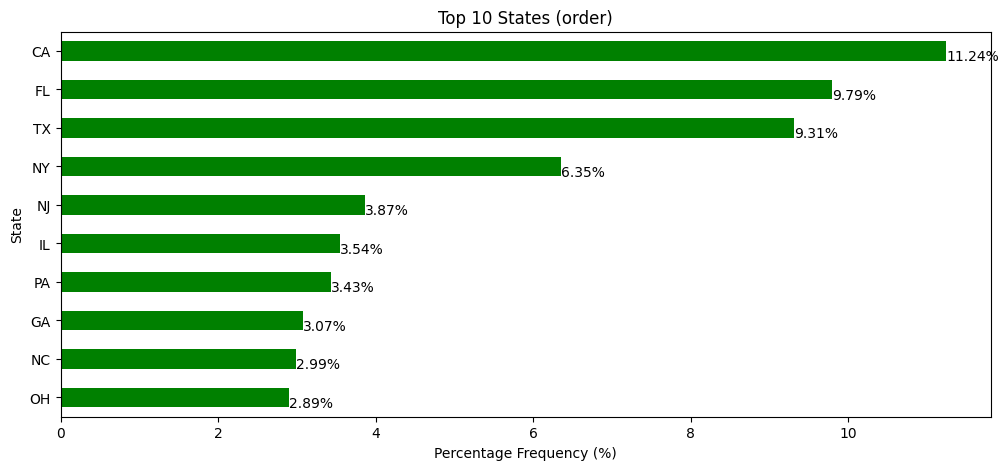

In [15]:
# Finding the top 10 states (order)
top_10_state_order = unique_orders['shipping_address_province_code'].value_counts(normalize=True).head(10) * 100

# Plotting the top 10 states (order)
plt.figure(figsize=(12, 5))
top_10_state_order.plot(kind='barh', color='green')

# Adding the percentage frequency on the bars
for index, value in enumerate(top_10_state_order):
    plt.text(value, index+0.25, f'{value:.2f}%', fontsize=10)

plt.title('Top 10 States (order)')
plt.xlabel('Percentage Frequency (%)')
plt.ylabel('State')
plt.gca().invert_yaxis()
plt.show()

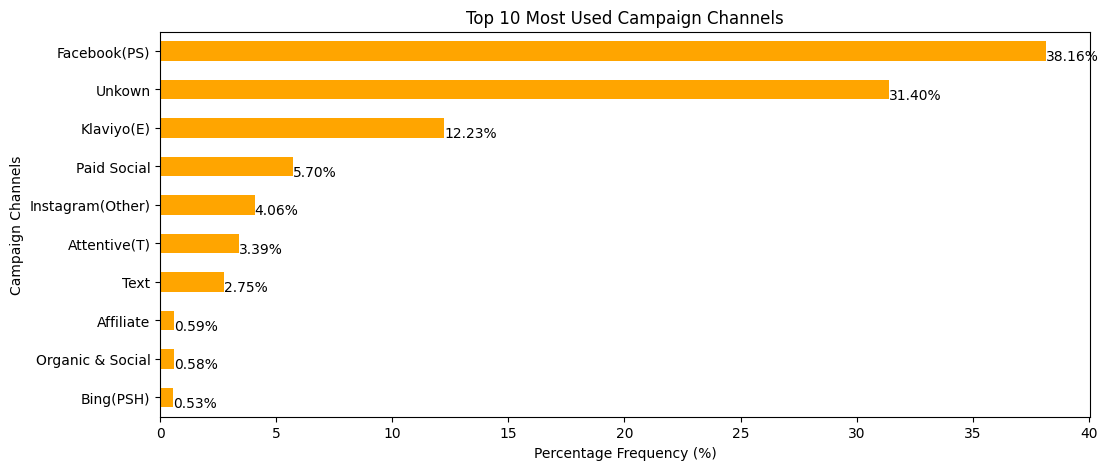

In [16]:
# Finding the top 10 most used campaign channels
top_10_channel = unique_orders['source_channel'].value_counts(normalize=True).head(10) * 100

# Plotting the top 10 most used campaign channels
plt.figure(figsize=(12, 5))
top_10_channel.plot(kind='barh', color='orange')

# Adding the percentage frequency on the bars
for index, value in enumerate(top_10_channel):
    plt.text(value, index+0.25, f'{value:.2f}%', fontsize=10)

plt.title('Top 10 Most Used Campaign Channels')
plt.xlabel('Percentage Frequency (%)')
plt.ylabel('Campaign Channels')
plt.gca().invert_yaxis()
plt.show()

### Feature Engineering
#### Calculate RFM (Recency - Frequency - Monetary)
Recency (R): This metric indicates how recently a customer has made a purchase. A lower recency value means the customer has purchased more recently, indicating higher engagement with the brand.

Frequency (F): This metric signifies how often a customer makes a purchase within a certain period. A higher frequency value indicates a customer who interacts with the business more often, suggesting higher loyalty or satisfaction.

Monetary (M): This metric represents the total amount of money a customer has spent over a certain period. Customers who have a higher monetary value have contributed more to the business, indicating their potential high lifetime value.


Recency (R):  
Days Since Last Purchase: This feature represents the number of days that have passed since the customer's last purchase. A lower value indicates that the customer has purchased recently, implying a higher engagement level with the business, whereas a higher value may indicate a lapse or decreased engagement.

In [17]:
# Find the most recent purchase date for each customer
customer_features = df.groupby('email')['created_at'].max().reset_index()

# Find the most recent date in the entire dataset
most_recent_date = df['created_at'].max()
print(most_recent_date)

# Calculate the number of days since the last purchase for each customer
customer_features['Days_Since_Last_Purchase'] = (most_recent_date - customer_features['created_at']).dt.days

# Remove the InvoiceDay column
customer_features.drop(columns=['created_at'], inplace=True)

customer_features.head(2)

2024-01-01 00:00:02+00:00


,email,Days_Since_Last_Purchase
0,+1508596smbak55@gmail.com,144
1,0-orange-braces@icloud.com,260


Frequency (F):   
Total Orders: This feature represents the total number of orders made by a customer. It helps in understanding the engagement level of a customer.    
Total Products Purchased: This feature indicates the total number of products (sum of quantities) purchased by a customer across all orders. It gives an insight into the customer's buying behavior in terms of the volume of products purchased.

In [18]:
# Calculate the total number of orders made by each customer
total_orders = df.groupby('email')['order_number'].nunique().reset_index()
total_orders.rename(columns={'order_number': 'Total_Orders'}, inplace=True)

# Calculate the total number of products purchased by each customer
total_products_purchased = df.groupby('email')['quantity'].sum().reset_index()
total_products_purchased.rename(columns={'quantity': 'Total_Products_Purchased'}, inplace=True)

# Merge the new features into the customer_features dataframe
customer_features = pd.merge(customer_features, total_orders, on='email')
customer_features = pd.merge(customer_features, total_products_purchased, on='email')

customer_features.head(2)

,email,Days_Since_Last_Purchase,Total_Orders,Total_Products_Purchased
0,+1508596smbak55@gmail.com,144,1,1
1,0-orange-braces@icloud.com,260,1,2


Monetary (M):    
Total Spend: This feature represents the total amount of money spent by each customer. It is calculated as the sum of the net of all orders made by a customer. This feature is crucial as it helps in identifying the total net revenue generated by each customer, which is a direct indicator of a customer's value.      
Average Order Value: This feature is calculated as the Total Spend divided by the Total Orders for each customer. It indicates the average value of a order made by a customer. This metric is useful in understanding the spending behavior of customers per order, which can assist in tailoring marketing strategies and offers to different customer segments based on their average spending patterns.

In [19]:
# Calculate the total spend by each customer
total_spend = df.groupby('email')['net'].sum().reset_index()
total_spend.rename(columns={'net': 'Total_Spend'}, inplace=True)

# Calculate the average order value for each customer
average_order_value = total_spend.merge(total_orders, on='email')
average_order_value['Average_Order_Value'] = average_order_value['Total_Spend'] / average_order_value['Total_Orders']

# Merge the new features into the customer_features dataframe
customer_features = pd.merge(customer_features, total_spend, on='email')
customer_features = pd.merge(customer_features, average_order_value[['email', 'Average_Order_Value']], on='email')

customer_features.head(2)

,email,Days_Since_Last_Purchase,Total_Orders,Total_Products_Purchased,Total_Spend,Average_Order_Value
0,+1508596smbak55@gmail.com,144,1,1,24.0,24.0
1,0-orange-braces@icloud.com,260,1,2,50.0,50.0


#### Other Helpful Features

Product Diversity:
   
Unique Skus: This feature represents the number of distinct products bought by a customer. A higher value indicates that the customer has a diverse taste or preference, buying a wide range of products, while a lower value might indicate a focused or specific preference. Understanding the diversity in product purchases can help in segmenting customers based on their buying diversity, which can be a critical input in personalizing product recommendations.

In [20]:
# Calculate the number of skus purchased by each customer
unique_skus = df.groupby('email')['sku'].nunique().reset_index()
unique_skus.rename(columns={'sku': 'Unique_Skus'}, inplace=True)

# Merge the new feature into the customer_features dataframe
customer_features = pd.merge(customer_features, unique_skus, on='email')

customer_features.head(2)

,email,Days_Since_Last_Purchase,Total_Orders,Total_Products_Purchased,Total_Spend,Average_Order_Value,Unique_Skus
0,+1508596smbak55@gmail.com,144,1,1,24.0,24.0,1
1,0-orange-braces@icloud.com,260,1,2,50.0,50.0,2


Behavioral Features:   
   
Average Interval: This feature represents the average number of days a customer waits before making another purchase. Understanding this can help in predicting when the customer is likely to make their next purchase, which can be a crucial metric for targeted marketing and personalized promotions.      
Favorite Shopping Weekday: This denotes the day of the week when the customer shops the most. This information can help in identifying the preferred shopping days of different customer segments, which can be used to optimize marketing strategies and promotions for different days of the week.                                    
Favorite Shopping Day: This denotes the day of the month when the customer shops the most. This information can help in identifying the preferred shopping days of different customer segments, which can be used to optimize marketing strategies and promotions for different days of the month.                
Favorite Shopping Hour: This refers to the hour of the day when the customer shops the most. Identifying the favorite shopping hour can aid in optimizing the timing of marketing campaigns and promotions to align with the times when different customer segments are most active.    
Most Commonly Used Channel: This shows the channel of campaigns which the customer most often used. This feature is helpful with targeted marketing and personalized promotions.       
Favorite Holiday: This refers to the ecommerce holiday and event when the customer shops the most according to the total net of each order. Identifying the favorite shopping holiday can aid in optimizing the marketing campaigns and promotions to align with the times when different customer segments are most active.   

In [21]:
# Extract day, day of week and hour from created_at
unique_orders['Day_Of_Week'] = unique_orders['created_at'].dt.dayofweek
unique_orders['Day'] = unique_orders['created_at'].dt.day
unique_orders['Hour'] = unique_orders['created_at'].dt.hour

# Calculate the average of intervals
average_interval = unique_orders.groupby('email')['interval'].mean().reset_index()
average_interval.rename(columns={'interval': 'Average_Interval'}, inplace=True)

# Find the favorite shopping day of the week
favorite_shopping_weekday = unique_orders.groupby(['email', 'Day_Of_Week']).size().reset_index(name='Count')
favorite_shopping_weekday = favorite_shopping_weekday.loc[favorite_shopping_weekday.groupby('email')['Count'].idxmax()][['email', 'Day_Of_Week']]

# Find the favorite shopping day of the month
favorite_shopping_day = unique_orders.groupby(['email', 'Day']).size().reset_index(name='Count')
favorite_shopping_day = favorite_shopping_day.loc[favorite_shopping_day.groupby('email')['Count'].idxmax()][['email', 'Day']]

# Find the favorite shopping hour of the day
favorite_shopping_hour = unique_orders.groupby(['email', 'Hour']).size().reset_index(name='Count')
favorite_shopping_hour = favorite_shopping_hour.loc[favorite_shopping_hour.groupby('email')['Count'].idxmax()][['email', 'Hour']]

# Merge the new features into the customer_features dataframe
customer_features = pd.merge(customer_features, average_interval, on='email')
customer_features = pd.merge(customer_features, favorite_shopping_weekday, on='email')
customer_features = pd.merge(customer_features, favorite_shopping_day, on='email')
customer_features = pd.merge(customer_features, favorite_shopping_hour, on='email')

customer_features.head(2)

,email,Days_Since_Last_Purchase,Total_Orders,Total_Products_Purchased,Total_Spend,Average_Order_Value,Unique_Skus,Average_Interval,Day_Of_Week,Day,Hour
0,+1508596smbak55@gmail.com,144,1,1,24.0,24.0,1,NaN,2,9,20
1,0-orange-braces@icloud.com,260,1,2,50.0,50.0,2,NaN,5,15,17


In [22]:
customer_features[['Day_Of_Week', 'Day', 'Hour']] = customer_features[['Day_Of_Week', 'Day', 'Hour']].astype(str)

In [23]:
# Find the most commonly used channel
most_commonly_used_channel = unique_orders.groupby(['email', 'source_channel']).size().reset_index(name='Count')
most_commonly_used_channel = most_commonly_used_channel.loc[most_commonly_used_channel.groupby('email')['Count'].idxmax()][['email', 'source_channel']]
most_commonly_used_channel.rename(columns={'source_channel': 'Most_Commonly_Used_Channel'}, inplace=True)

# Merge the new features into the customer_features dataframe
customer_features = pd.merge(customer_features, most_commonly_used_channel, on='email')

customer_features.head(2)

,email,Days_Since_Last_Purchase,Total_Orders,Total_Products_Purchased,Total_Spend,Average_Order_Value,Unique_Skus,Average_Interval,Day_Of_Week,Day,Hour,Most_Commonly_Used_Channel
0,+1508596smbak55@gmail.com,144,1,1,24.0,24.0,1,NaN,2,9,20,Unkown
1,0-orange-braces@icloud.com,260,1,2,50.0,50.0,2,NaN,5,15,17,Klaviyo(E)


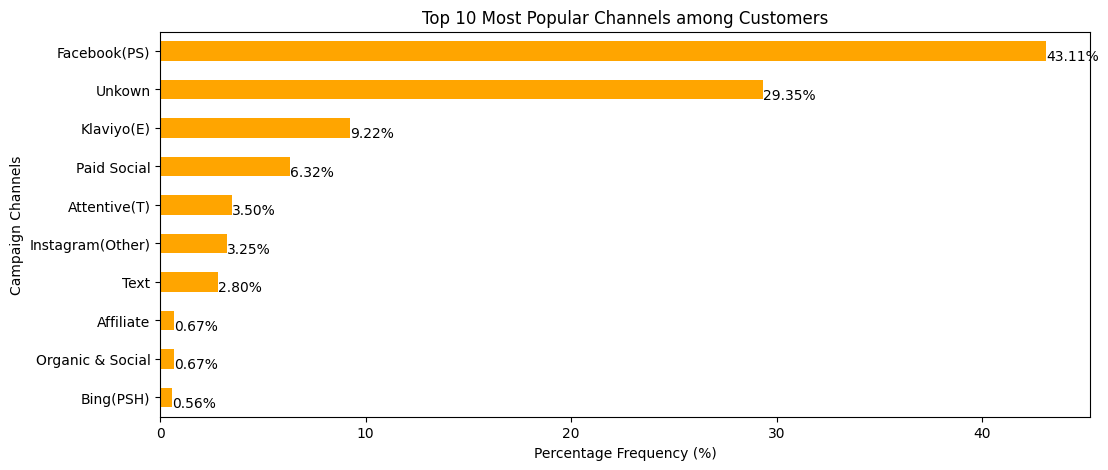

In [24]:
# Finding the top 10 most popular campaign channels among customers
top_10_channel_customer = customer_features['Most_Commonly_Used_Channel'].value_counts(normalize=True).head(10) * 100

# Plotting the top 10 most popular campaign channels
plt.figure(figsize=(12, 5))
top_10_channel_customer.plot(kind='barh', color='orange')

# Adding the percentage frequency on the bars
for index, value in enumerate(top_10_channel_customer):
    plt.text(value, index+0.25, f'{value:.2f}%', fontsize=10)

plt.title('Top 10 Most Popular Channels among Customers')
plt.xlabel('Percentage Frequency (%)')
plt.ylabel('Campaign Channels')
plt.gca().invert_yaxis()
plt.show()

In [25]:
# Calculate the total net revenue of each unique order
total_net = df.groupby('order_number')['net'].sum().reset_index()
total_net.rename(columns={'net': 'Total_Net'}, inplace=True)

# Merge the new features into the unique_orders dataframe
unique_orders = pd.merge(unique_orders, total_net, on='order_number')
unique_orders.head(2)

,order_number,created_at,email,interval,shipping_address_province_code,source_channel,Day_Of_Week,Day,Hour,Total_Net
0,1348628,2023-01-24 00:00:56+00:00,windpooh22@aol.com,NaN,AA,Klaviyo(E),1,24,0,48.0
1,1573984,2023-07-19 16:31:24+00:00,laurilewis@hotmail.com,NaN,AA,Facebook(PS),2,19,16,120.5


In [26]:
project_id = 'fb-business-datasets'  # Google Cloud project ID
destination_table = 'fb-business-datasets.ds_tables.unique_orders_23'  # destination table name in BigQuery
unique_orders.to_gbq(destination_table, project_id=project_id, if_exists='replace')

100%|██████████| 1/1 [00:00<00:00, 4092.00it/s]


In [27]:
%%bigquery unique_orders --project fb-business-datasets
SELECT order_number, created_at, email, `interval`, shipping_address_province_code, source_channel, Day_Of_Week, Day, Hour, Total_Net
FROM fb-business-datasets.ds_tables.unique_orders_23

Query is running:   0%|          |

Downloading:   0%|          |

In [28]:
%%bigquery holiday --project fb-business-datasets
SELECT *
FROM fb-business-datasets.ds_tables.holiday_23

Query is running:   0%|          |

Downloading:   0%|          |

In [29]:
unique_orders.drop(columns=['created_at', 'email'], inplace=True)
unique_orders = pd.merge(unique_orders, holiday, on='order_number')
unique_orders.head(2)

,order_number,interval,shipping_address_province_code,source_channel,Day_Of_Week,Day,Hour,Total_Net,created_at,email,...,Mother's Day,Father's Day,Independence Day,Labor Day,Halloween,Thanksgiving,Black Friday,Cyber Monday,Super Saturday,Christmas
0,1467005,NaN,AK,Attentive(T),0,1,2,34.5,2023-05-01 02:44:22+00:00,lesliemastick@gmail.com,...,0,0,0,0,0,0,0,0,0,0
1,1467814,44.0,AL,Attentive(T),0,1,18,119.0,2023-05-01 18:27:32+00:00,diamond412_us@yahoo.com,...,0,0,0,0,0,0,0,0,0,0


In [30]:
## Create a new df to calculate the holiday spending for each customers

holidays = ['New Year', 'Super Bowl', 'Valentine\'s Day', 'Presidents\' Day', 'International Women\'s Day', 'Pi Day',
            'St Patrick\'s Day', 'Easter', 'Earth Day', 'Mother\'s Day', 'Father\'s Day', 'Independence Day', 'Labor Day', 'Halloween',
            'Thanksgiving', 'Black Friday', 'Cyber Monday', 'Super Saturday', 'Christmas']

# Initialize an empty df to store results
customer_holiday = pd.DataFrame()

# Iterate over each holiday
for holiday in holidays:
    holiday_net = unique_orders[unique_orders[holiday] == 1].groupby('email')['Total_Net'].sum().reset_index()
    holiday_net.rename(columns={'Total_Net': f'{holiday} Net'}, inplace=True)

    # If the result df is empty, initialize it with the holiday net
    if customer_holiday.empty:
       customer_holiday = holiday_net
    else:
        # Merge the new holiday revenue data with the existing data
        customer_holiday = pd.merge(customer_holiday, holiday_net, on='email', how='outer')

# Fill NaN with 0 if there are any missing values due to merge
customer_holiday.fillna(0, inplace=True)
customer_holiday.head(2)

,email,New Year Net,Super Bowl Net,Valentine's Day Net,Presidents' Day Net,International Women's Day Net,Pi Day Net,St Patrick's Day Net,Easter Net,Earth Day Net,Mother's Day Net,Father's Day Net,Independence Day Net,Labor Day Net,Halloween Net,Thanksgiving Net,Black Friday Net,Cyber Monday Net,Super Saturday Net,Christmas Net
0,14tinalynn@gmail.com,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1966greaser@gmail.com,59.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
# Find the favorite holiday of each unique customer according to the sum of total_net during each holiday/event

customer_holiday['Favorite_Holiday'] = customer_holiday.iloc[:,1:].idxmax(axis=1)
customer_holiday['Favorite_Holiday'] = customer_holiday['Favorite_Holiday'].str.replace(' Net', '')
customer_features = pd.merge(customer_features, customer_holiday[['email', 'Favorite_Holiday']], on='email', how='left')
#customer_features.loc[pd.isnull(customer_features['Favorite_Holiday']), 'Favorite_Holiday'] = 'None'
customer_features.head(2)

,email,Days_Since_Last_Purchase,Total_Orders,Total_Products_Purchased,Total_Spend,Average_Order_Value,Unique_Skus,Average_Interval,Day_Of_Week,Day,Hour,Most_Commonly_Used_Channel,Favorite_Holiday
0,+1508596smbak55@gmail.com,144,1,1,24.0,24.0,1,NaN,2,9,20,Unkown,NaN
1,0-orange-braces@icloud.com,260,1,2,50.0,50.0,2,NaN,5,15,17,Klaviyo(E),NaN


In [32]:
project_id = 'fb-business-datasets'  # Google Cloud project ID
destination_table = 'fb-business-datasets.ds_tables.customer_features_23'  # destination table name in BigQuery
customer_features.to_gbq(destination_table, project_id=project_id, if_exists='replace')

100%|██████████| 1/1 [00:00<00:00, 8144.28it/s]


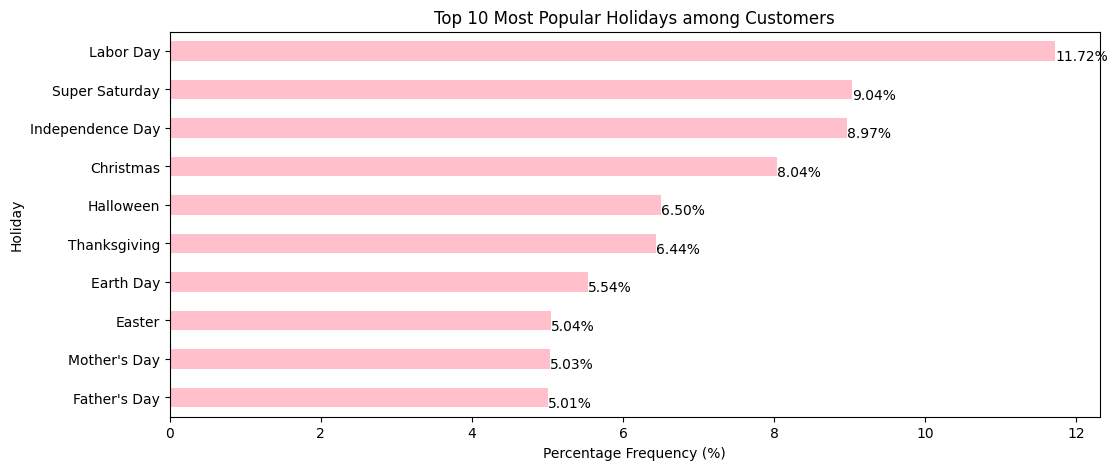

In [33]:
# Finding the top 10 most popular holidays among customers (favorite holiday)
top_10_favorite_holiday = customer_features['Favorite_Holiday'].value_counts(normalize=True).head(10) * 100

# Plotting the top 10 most popular holidays among customers (favorite holiday)
plt.figure(figsize=(12, 5))
top_10_favorite_holiday.plot(kind='barh', color='pink')

# Adding the percentage frequency on the bars
for index, value in enumerate(top_10_favorite_holiday):
    plt.text(value, index+0.25, f'{value:.2f}%', fontsize=10)

plt.title('Top 10 Most Popular Holidays among Customers')
plt.xlabel('Percentage Frequency (%)')
plt.ylabel('Holiday')
plt.gca().invert_yaxis()
plt.show()

In [34]:
def net_by_holiday(df, holidays):

    net_data = []

    for holiday in holidays:
        # Calculate the sum of net for records created during the holiday
        net_sum = df.loc[df[holiday] == 1, 'Total_Net'].sum()
        net_data.append({'Holiday': holiday.capitalize(), 'Net_during_Holiday': net_sum})
    net_df = pd.DataFrame(net_data)

    return net_df

net_df_23 = net_by_holiday(unique_orders[unique_orders['created_at'].dt.year == 2023], holidays).set_index('Holiday')
net_df_23

,Net_during_Holiday
Holiday,
New year,116930.30
Super bowl,349276.40
Valentine's day,364219.30
Presidents' day,365190.10
International women's day,336062.04
Pi day,478411.50
St patrick's day,613561.80
Easter,362966.20
Earth day,408167.55


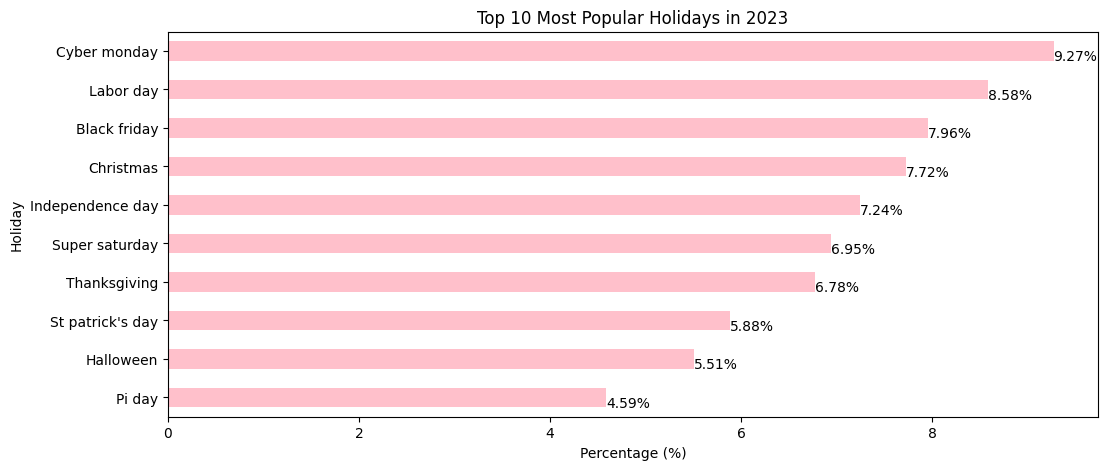

In [35]:
# Finding the top 10 most popular holiday in 2023 (total net)
top_holiday_23 = (net_df_23['Net_during_Holiday']/net_df_23['Net_during_Holiday'].sum() * 100).sort_values(ascending = False)
top_10_holiday_23 = top_holiday_23.head(10)

# Plotting the top 10 most popular holidays in 2023 (total net)
plt.figure(figsize=(12, 5))
top_10_holiday_23.plot(kind='barh', color='pink')

# Adding the percentage on the bars
for index, value in enumerate(top_10_holiday_23):
    plt.text(value, index+0.25, f'{value:.2f}%', fontsize=10)

plt.title('Top 10 Most Popular Holidays in 2023')
plt.xlabel('Percentage (%)')
plt.ylabel('Holiday')
plt.gca().invert_yaxis()
plt.show()

In [36]:
net_df_24 = net_by_holiday(unique_orders[unique_orders['created_at'].dt.year == 2024], holidays).set_index('Holiday')
net_df_24

,Net_during_Holiday
Holiday,
New year,0.0
Super bowl,0.0
Valentine's day,0.0
Presidents' day,0.0
International women's day,0.0
Pi day,0.0
St patrick's day,0.0
Easter,0.0
Earth day,0.0


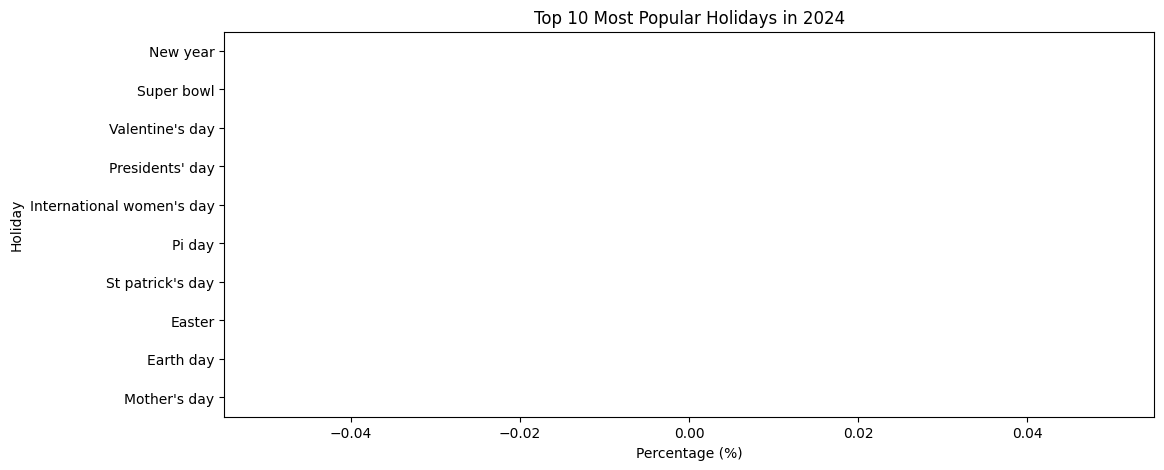

In [37]:
# Finding the top 10 most popular holiday in 2024 (total net)
top_holiday_24 = (net_df_24['Net_during_Holiday']/net_df_24['Net_during_Holiday'].sum() * 100).sort_values(ascending = False)
top_10_holiday_24 = top_holiday_24.head(10)

# Plotting the top 10 most popular holidays in 2024 (total net)
plt.figure(figsize=(12, 5))
top_10_holiday_24.plot(kind='barh', color='pink')

# Adding the percentage on the bars
for index, value in enumerate(top_10_holiday_24):
    plt.text(value, index+0.25, f'{value:.2f}%', fontsize=10)

plt.title('Top 10 Most Popular Holidays in 2024')
plt.xlabel('Percentage (%)')
plt.ylabel('Holiday')
plt.gca().invert_yaxis()
plt.show()